#Hand Written Digit Prediction - classification Analysis

The digits datasets constrains of 8*8 pixel images of digits.The images attribute of the dataset stores 8*8 arrays of grayscale values for each image. We eill use these arrays to visualize the first 4 images.The target attribute of the dataset stored the digit each image represents

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df =load_digits()

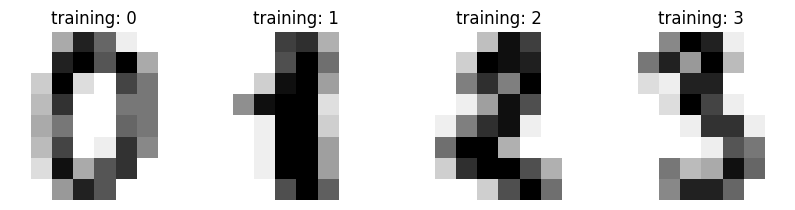

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
     ax.set_axis_off()
     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
     ax.set_title("training: %i" % label)



#Data Preprocessing

flatten image



In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

#Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16
data.min()

0.0

In [ ]:
data[0]

array([0.        , 0.        , 0.0012207 , 0.00317383, 0.00219727,
       0.00024414, 0.        , 0.        , 0.        , 0.        ,
       0.00317383, 0.00366211, 0.00244141, 0.00366211, 0.0012207 ,
       0.        , 0.        , 0.00073242, 0.00366211, 0.00048828,
       0.        , 0.00268555, 0.00195312, 0.        , 0.        ,
       0.00097656, 0.00292969, 0.        , 0.        , 0.00195312,
       0.00195312, 0.        , 0.        , 0.0012207 , 0.00195312,
       0.        , 0.        , 0.00219727, 0.00195312, 0.        ,
       0.        , 0.00097656, 0.00268555, 0.        , 0.00024414,
       0.00292969, 0.00170898, 0.        , 0.        , 0.00048828,
       0.00341797, 0.0012207 , 0.00244141, 0.00292969, 0.        ,
       0.        , 0.        , 0.        , 0.00146484, 0.00317383,
       0.00244141, 0.        , 0.        , 0.        ])

#Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

#Predict Test Data

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array([9, 3, 7, 3, 5, 5, 4, 1, 8, 3, 2, 7, 8, 7, 6, 2, 1, 2, 1, 4, 4, 0,
       5, 8, 3, 6, 9, 6, 4, 9, 8, 4, 0, 1, 2, 8, 0, 3, 3, 4, 9, 0, 8, 4,
       6, 9, 6, 7, 1, 5, 2, 7, 9, 9, 3, 5, 9, 9, 1, 3, 9, 2, 5, 5, 4, 5,
       0, 9, 3, 0, 9, 1, 6, 6, 3, 4, 2, 4, 1, 6, 8, 9, 1, 3, 0, 9, 4, 1,
       0, 2, 4, 6, 8, 5, 3, 0, 7, 8, 0, 3, 6, 7, 6, 5, 3, 9, 1, 8, 4, 3,
       9, 4, 2, 5, 7, 1, 7, 0, 3, 0, 9, 6, 9, 9, 2, 1, 3, 0, 2, 4, 5, 7,
       5, 1, 6, 2, 1, 2, 1, 4, 8, 1, 6, 9, 8, 4, 0, 7, 3, 2, 7, 3, 4, 3,
       7, 6, 7, 4, 3, 9, 1, 4, 5, 9, 6, 1, 1, 1, 6, 0, 9, 3, 5, 1, 8, 6,
       1, 3, 1, 3, 9, 5, 0, 9, 0, 7, 4, 2, 8, 3, 3, 9, 0, 1, 6, 3, 9, 3,
       0, 7, 3, 5, 5, 6, 1, 6, 4, 1, 6, 8, 1, 3, 9, 5, 2, 4, 7, 1, 4, 9,
       6, 0, 4, 6, 0, 1, 9, 2, 6, 0, 7, 8, 5, 9, 4, 0, 3, 2, 1, 0, 6, 6,
       8, 4, 1, 5, 7, 0, 2, 8, 7, 5, 6, 4, 9, 2, 6, 6, 4, 6, 4, 4, 3, 0,
       8, 3, 7, 5, 0, 5, 6, 0, 0, 4, 6, 2, 5, 0, 3, 9, 8, 8, 7, 7, 3, 4,
       4, 0, 4, 0, 2, 4, 3, 3, 6, 7, 2, 7, 7, 3, 9,

#Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 50,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 68,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 48,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 51]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.91      1.00      0.95        48
           2       1.00      0.89      0.94        56
           3       0.96      1.00      0.98        54
           4       1.00      0.99      0.99        69
           5       1.00      0.96      0.98        50
           6       0.98      0.98      0.98        62
           7       1.00      0.98      0.99        45
           8       0.94      0.94      0.94        49
           9       0.91      0.94      0.93        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

